         level     count       mean        std    min    25%    50%    75%   
0  0 (1_Start)  100000.0   18.29552  10.058935    1.0    9.0   19.0   30.0  \
1  1 (2_Start)  100000.0   26.83224   6.658661    2.0   25.0   30.0   30.0   
2  2 (3_Start)  100000.0   48.64733  10.457561    5.0   41.0   50.0   60.0   
3  3 (4_Start)  100000.0   79.70439  13.049708   25.0   70.0   81.0   90.0   
4  4 (5_Start)  100000.0  121.27170  15.862977   55.0  112.0  120.0  132.0   
5   5 (1_Fire)  100000.0  142.11690  17.070240   66.0  130.0  144.0  152.0   
6   6 (2_Fire)  100000.0  162.87382  18.197319   88.0  150.0  163.0  178.0   
7   7 (3_Fire)  100000.0  194.08133  19.779369  100.0  180.0  195.0  210.0   
8   8 (4_Fire)  100000.0  225.23958  21.288855  130.0  210.0  226.0  240.0   
9   9 (5_Fire)  100000.0  266.90423  23.102864  167.0  251.0  270.0  282.0   

     max  
0   30.0  
1   60.0  
2   89.0  
3  120.0  
4  180.0  
5  210.0  
6  240.0  
7  270.0  
8  301.0  
9  353.0  


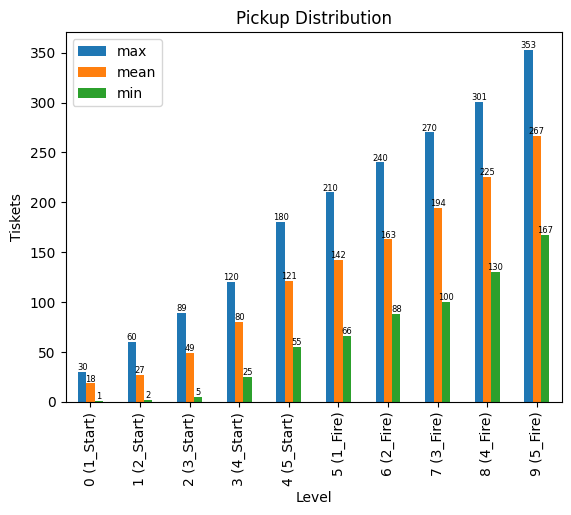

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import pickup_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    with ProcessPoolExecutor() as executor:
        for r in executor.map(pickup_hero.pickup, [0] * 100000):
            results = np.append(results, r, 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='Pickup Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()

        level     count       mean        std    min    25%    50%    75%   
0  0 (0_Fire)  100000.0   23.62279  15.109847    1.0   10.0   23.0   36.0  \
1  1 (1_Fire)  100000.0   56.20610  17.839394    4.0   44.0   56.0   68.0   
2  2 (2_Fire)  100000.0   89.15158  21.749975   14.0   75.0   89.0  104.0   
3  3 (3_Fire)  100000.0  138.60318  26.721849   34.0  121.0  139.0  157.0   
4  4 (4_Fire)  100000.0  188.03567  30.907030   67.0  167.0  189.0  209.0   
5  5 (5_Fire)  100000.0  254.00930  35.745034  104.0  230.0  254.0  279.0   

     max  
0   50.0  
1  106.0  
2  157.0  
3  240.0  
4  297.0  
5  397.0  


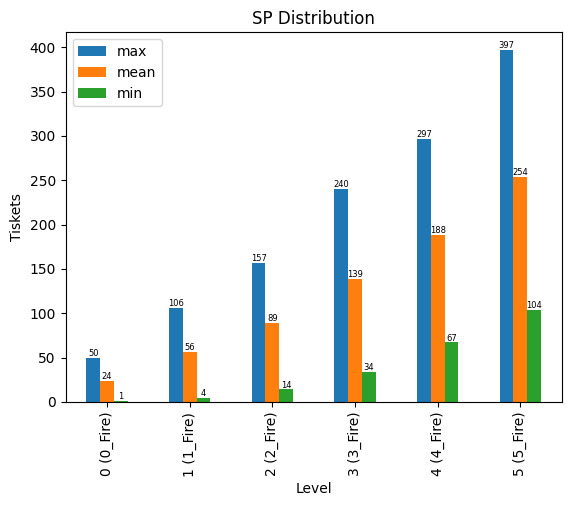

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import sp_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    with ProcessPoolExecutor() as executor:
        for r in executor.map(sp_hero.sp, [0] * 100000):
            results = np.append(results, r, 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='SP Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()